### 0a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan

In [102]:
import pandas as pd

# Read all sheets, skipping the first 8 rows
all_sheets = pd.read_excel("riket2023_åk9_np.xlsx", skiprows=8, sheet_name=None)     

# Extract individual DataFrames for each sheet 
english = all_sheets["Engelska"]
mathematics = all_sheets["Matematik"]
swedish = all_sheets["Svenska"]
swedish_second = all_sheets["Svenska som andraspråk"]


# Function for renaming columns 
def rename_columns(df):
    # Define a list of new column names 
    new_columns = [
        'Plats',  
        'Huvudman',  
        'Totalt (A-F)',  
        'Flickor (A-F)',  
        'Pojkar (A-F)',  
        'Totalt (A-E)',  
        'Flickor (A-E)',  
        'Pojkar (A-E)',  
        'Totalt (poäng)',  
        'Flickor (poäng)', 
        'Pojkar (poäng)'
    ]
    
    # Rename the columns of the DataFrame using the list of new column names
    df.columns = new_columns
     # Filter out rows with Huvudman "Skolverket" only for the DataFrame for Swedish as second language
    if df is swedish_second and "Skolverket" in df["Huvudman"].values:
        df = df[df["Huvudman"] != "Skolverket"]
    # Return the DataFrame with updated column names
    return df

# Use the function to rename columns for each DataFrame
english = rename_columns(english)
mathematics = rename_columns(mathematics)
swedish = rename_columns(swedish)
swedish_second = rename_columns(swedish_second)


###  0b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor

In [103]:
# Extract number of girls with grades A-F
girls_A_to_F = mathematics.loc[0, "Flickor (A-F)"]
#Extract the percentage of girls with grades A-E and convert to a decimal
girls_A_to_E = mathematics.loc[0, "Flickor (A-E)"] / 100  
# Calculate number of girls with F by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
girls_F = girls_A_to_F * (1 - girls_A_to_E)
rounded_girls_F =round(girls_F)

print("Antal flickor som fått betyget F:", rounded_girls_F)

# Extract number of girls with grades A-F
boys_A_to_F = mathematics.loc[0, "Pojkar (A-F)"]
#Extract the percentage of boys with grades A-E and convert to a decimal
boys_A_to_E = mathematics.loc[0, "Pojkar (A-E)"] / 100
# Calculate number of boys with F by subtracting the percentage of boys with grades A to E from 1 and multiplying by the total number of boys with grades A to F
boys_F = boys_A_to_F * (1 - boys_A_to_E)
rounded_boys_F =round(boys_F)

print("Antal pojkar som fått betyget F:", rounded_boys_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


### 0c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

C:\Users\annah\AppData\Local\Temp\ipykernel_20996\544012275.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\annah\AppData\Local\Temp\ipykernel_20996\544012275.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



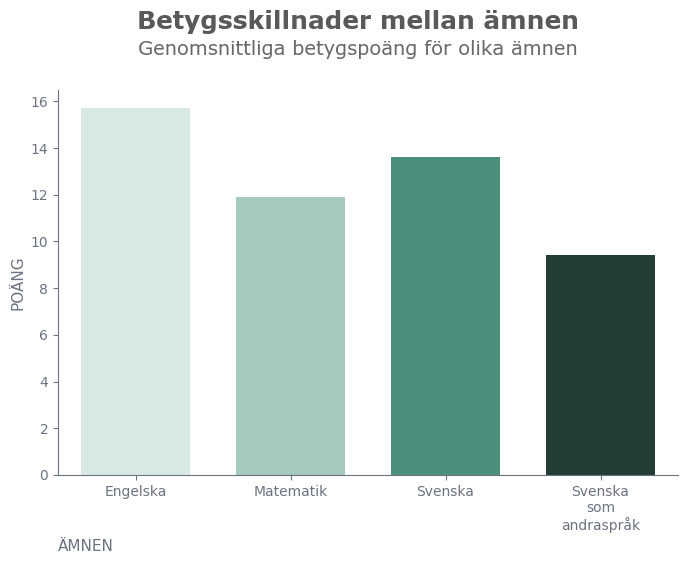

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define subjects
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# List of points
points = [english.loc[0, "Totalt (poäng)"], 
          mathematics.loc[0, "Totalt (poäng)"], 
          swedish.loc[0, "Totalt (poäng)"], 
          swedish_second.loc[0, "Totalt (poäng)"]]

# Colors 
colors = {"Engelska": "#d5ebe5", "Matematik": "#9fd1c3", "Svenska": "#429981", "Svenska som andraspråk": "#204238"}

# Create a list of colors in the same order as subjects
colors_list = [colors[subject] for subject in subjects]

# Create figure and axis objects
fig, ax = plt.subplots()
# Create a bar plot
sns.barplot(x=subjects, y=points, palette=colors_list, width = 0.7, ax=ax) 
# Set x-axis tick labels with a line break for the last subject 
ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")]) 
#Set x-axis label
plt.xlabel("ÄMNEN", loc="left", color="#6b7280", fontsize=11)
# Set y-axis label
plt.ylabel("POÄNG", loc="center", color="#6b7280", fontsize=11)
# Set title
#plt.title("TOTALA POÄNG PER ÄMNE", fontname = "Verdana", loc="left", pad=35, color="dimgray", fontsize=16) 
plt.suptitle('Betygsskillnader mellan ämnen', fontname = "Verdana", fontsize=18, fontweight='bold', color="#595959", y=1.04)
plt.figtext(0.5, 0.95, 'Genomsnittliga betygspoäng för olika ämnen', fontname = "Verdana", fontsize=14, color="dimgray", ha='center')
#Remove and change lines
ax.tick_params(axis="both", colors="#6b7280")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#6b7280")
ax.spines["bottom"].set_color("#6b7280")

fig.set_size_inches(8, 5)

plt.show()

###  d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen

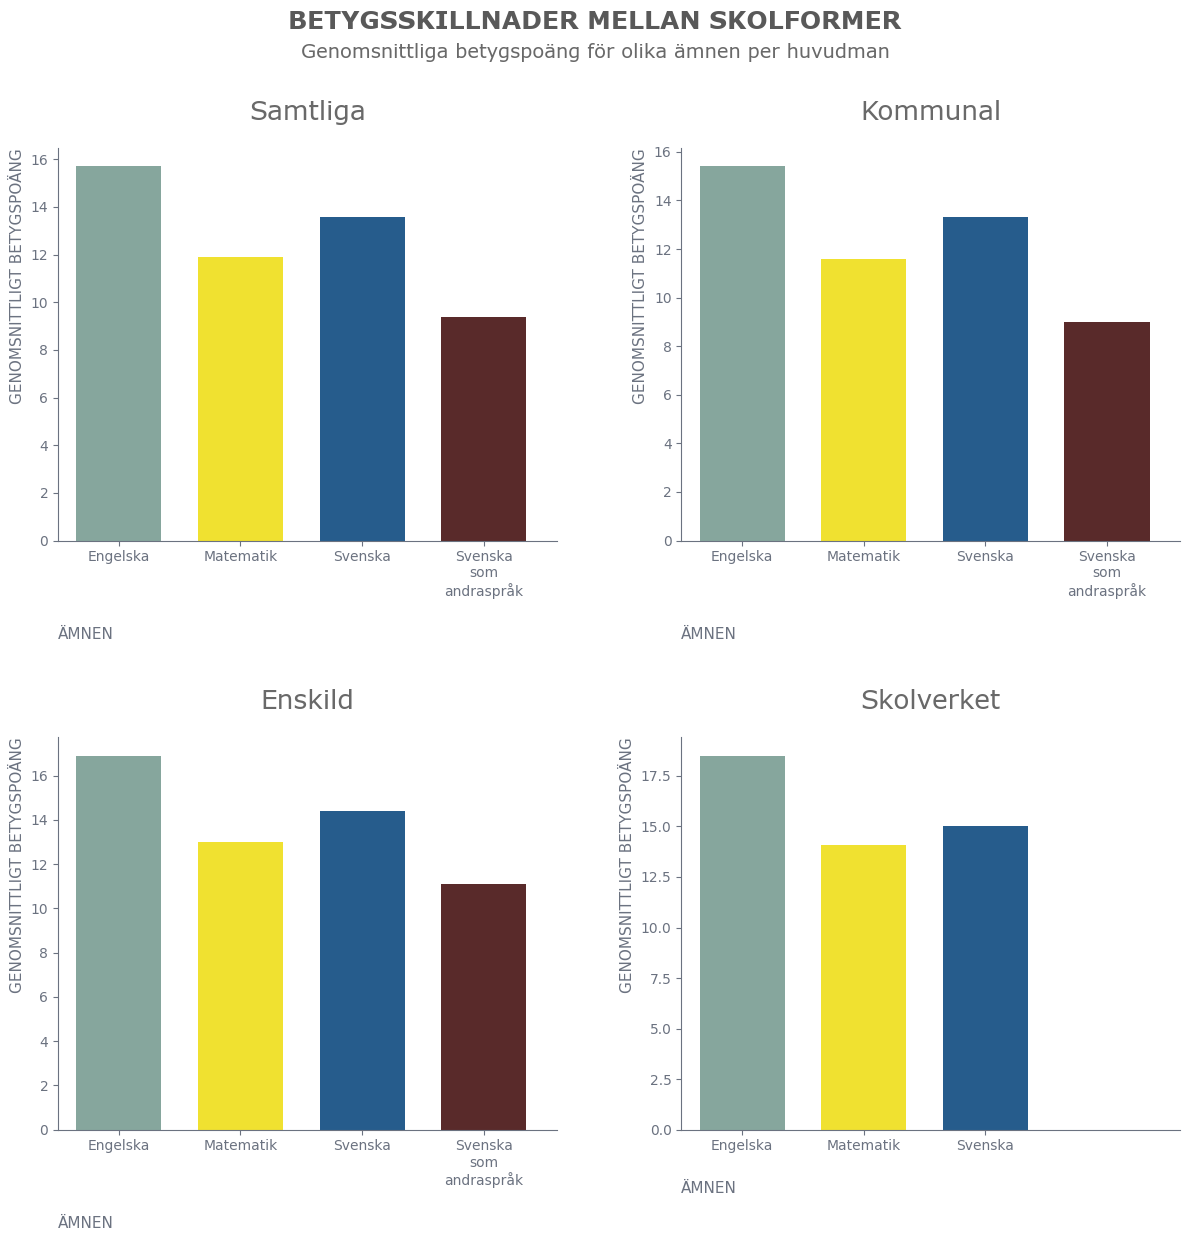

In [105]:
import numpy as np

# Define the main categories (huvudmän) and subjects (ämnen)
principals = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# List of dataframes for each subject
dataframes = [english, mathematics, swedish, swedish_second]

def plot(dataframes, principals, subjects):
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    # Define colors for each subject
    colors = {"Engelska": "#86A69D", "Matematik": "#f0e130", "Svenska": "#265C8C", "Svenska som andraspråk": "#592A2A"}
    
    # Standard width for bars, regardless of how many there are
    standard_bar_width = 0.7
    # Maximum number of bars (subjects)
    max_bars = len(subjects)  

    # Subplot titel
    plt.suptitle('BETYGSSKILLNADER MELLAN SKOLFORMER', fontname = "Verdana", fontsize=18, fontweight='bold', color="#595959", y=1.03)
    plt.figtext(0.5, 0.99, 'Genomsnittliga betygspoäng för olika ämnen per huvudman', fontname = "Verdana", fontsize=14, color="dimgray", ha='center')
    
    for ax, principal in zip(axes, principals):
        # Collect the total points for each subject for the current principal from the dataframes
        points = [df.loc[df['Huvudman'] == principal, 'Totalt (poäng)'].values[0] if principal in df['Huvudman'].values else np.nan for df in dataframes]
        # Filter out non-NaN points to only have available points
        available_points = [p for p in points if not np.isnan(p)]
        # Filter the subjects to only include those with available points
        available_subjects = [subjects[i] for i, p in enumerate(points) if not np.isnan(p)]
        
        # Calculate the x positions for bars
        bar_positions = np.arange(len(available_subjects))

        # Draw bars with specific colors and fixed width
        for i, point in enumerate(available_points):
            subject_color = colors[available_subjects[i]]
            ax.bar(bar_positions[i], point, width=standard_bar_width, color=subject_color, align='center')
        
        # Adjust the tick marks on the x-axis
        ax.set_xticks(bar_positions)
        ax.set_xticklabels([subject.replace(" ", "\n") for subject in available_subjects])
        ax.set_xlabel("ÄMNEN", loc="left", color="#6b7280", fontsize=11, labelpad=20)
        ax.set_ylabel("GENOMSNITTLIGT BETYGSPOÄNG", loc="top", color="#6b7280", fontsize=11)
        ax.set_title(principal, pad=20, fontname = "Verdana", color="dimgray", fontsize=19)
        # Customize the color of the tick parameters
        ax.tick_params(axis="both", colors="#6b7280")
        # Remove top and right borders
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#6b7280")
        ax.spines["bottom"].set_color("#6b7280")
        # Adjust the x-axis limits to have a fixed range regardless of the number of bars
        ax.set_xlim([-0.5, max_bars - 0.4])

    plt.tight_layout()
    # Adjust space between plots
    plt.subplots_adjust(wspace=0.25, hspace=0.5)
    plt.show()

# Call function
plot(dataframes, principals, subjects)



### 1a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,flickor och pojkar i samma graf.


In [106]:
# Specify sheet 
sheet = "Tabell 1B"
# Read file, skipping the first 7 rows and extract the DataFrame for the specified sheet
df_grades = pd.read_excel("betyg_o_prov_riksnivå.xlsx", skiprows=7, sheet_name=sheet)

In [107]:
# Define a list of new column names 
new_columns = [
    "Läsår/Huvudman/Bakgrund",  
    "Meritvärde totalt (16 ämnen)",  
    "Meritvärde flickor (16 ämnen)",  
    "Meritvärde pojkar (16 ämnen)",  
    "Meritvärde totalt (17 ämnen)",  
    "Meritvärde flickor (17 ämnen)",  
    "Meritvärde pojkar (17 ämnen)",  
    "Totalt (saknar godkänt)",  
    "Flickor (saknar godkänt)",  
    "Pojkar (saknar godkänt)"
]
    
# Rename columns 
df_grades.columns = new_columns

In [216]:
import plotly.express as px

# Using Plotly to create line chart
# Using only the first five rows
fig = px.line(
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Totalt (saknar godkänt)",
        "Flickor (saknar godkänt)",
        "Pojkar (saknar godkänt)"
    ],
    labels={"value": "Andel som saknar godkänt (%)", "variable": "Kategori"},
    title="Andel elever som saknar godkänt betyg per läsår",
    # Add markers 
    markers=True
)  

# Update categories
fig.for_each_trace(lambda t: t.update(name = {
    "Totalt (saknar godkänt)": "Totalt",
    "Flickor (saknar godkänt)": "Flickor",
    "Pojkar (saknar godkänt)": "Pojkar"
}.get(t.name, t.name))) 


# Updating layout
fig.update_layout(
    title={
        "text": "Andel elever som saknar godkänt betyg per läsår",
        "y": 0.92, 
        "x": 0.45,
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(
            family="Arial Black",
            size=20,
            color="#595959"
        ),
    },
    xaxis_title="",
    yaxis_title="", 
    xaxis=dict(tickmode="linear"),
    paper_bgcolor="white",
    plot_bgcolor="white",
    margin=dict(t=150),  
    height=500,
    width=1600,
    legend=dict(
        x=0.996,  
        y=1,   
        xanchor="center" 
    )
)

# Adding subtitle
fig.add_annotation(
    dict(
        font=dict(
            family="Verdana",
            size=17,
            color="dimgray"
        ),
        x=0.5,
        y=1.24,  
        showarrow=False,
        text="Jämförelse av andel elever som saknar godkänt betyg för totalt, flickor och pojkar och läsåren 2018/19 - 2022/23",
        xref="paper",
        yref="paper",
        xanchor="center",
        yanchor="bottom"
    )
)

fig.show()


### 1b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23

In [210]:
# Using Plotly to create line chart
# Using only the first five rows
fig = px.line(
    df_grades.head(5),
    x="Läsår/Huvudman/Bakgrund",
    y=[
        "Meritvärde totalt (16 ämnen)",
        "Meritvärde flickor (16 ämnen)",
        "Meritvärde pojkar (16 ämnen)"
    ],
    labels={"value": "Meritvärde för 16 ämnen", "variable": "Kategori"},
    title="Meritvärde för 16 ämnen",
    markers=True
)  

# Updating layout
fig.update_layout(
    title={
        "text": "Meritvärden över tid för",
        "y": 0.92, 
        "x": 0.45,
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(
            family="Arial Black",
            size=20,
            color="#595959"
        ),
    },
    xaxis_title="",
    yaxis_title="", 
    xaxis=dict(tickmode="linear"),
    paper_bgcolor="white",
    plot_bgcolor="white",
    margin=dict(t=150), 
    height=500,
    width=1600
)

# Adding subtitle
fig.add_annotation(
    dict(
        font=dict(
            family="Verdana",
            size=17,
            color="dimgray"
        ),
        x=0.5,
        y=1.24,  
        showarrow=False,
        text="Jämförelse av genomsnittligt meritvärde för totalt, flickor och pojkar och läsåren 2018/19 - 2022/23",
        xref="paper",
        yref="paper",
        xanchor="center",
        yanchor="bottom"
    )
)

fig.show()


### 1c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [132]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go


# Filter data first plot
df_avg_grades = df_grades[df_grades["Läsår/Huvudman/Bakgrund"].isin([
    "Förgymnasial utbildning",
    "Gymnasial utbildning",
    "Eftergymnasial utbildning"
])]

# Filter data second plot
df_lacking_grades = df_grades[df_grades["Läsår/Huvudman/Bakgrund"].isin([
    "Förgymnasial utbildning",
    "Gymnasial utbildning",
    "Eftergymnasial utbildning"
])]

# Create a subplot 
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genomsnittligt meritvärde", "Andel som saknar godkänt (%)"))


# First plot
fig.add_trace(
    go.Bar(
        x=df_avg_grades["Läsår/Huvudman/Bakgrund"].str.replace(' ', '<br>'),  # Add line breaks 
        y=df_avg_grades["Meritvärde totalt (16 ämnen)"], 
        name="Meritvärde 16 ämnen",
        marker=dict(color="#75B2BF")
    ),
    row=1, col=1
)

# Second plot
fig.add_trace(
    go.Bar(
        x=df_lacking_grades["Läsår/Huvudman/Bakgrund"].str.replace(' ', '<br>'), # Add line breaks 
        y=df_lacking_grades["Totalt (saknar godkänt)"],
        name="Andel som saknar godkänt",
        marker=dict(color="#025159")
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Utbildningsnivå", showline=True, linecolor="#6b7280",  row=1, col=1)  # First subplot
fig.update_yaxes(title_text="Meritvärde", showline=True, linecolor="#6b7280", row=1, col=1)
fig.update_xaxes(title_text="Utbildningsnivå", showline=True, linecolor="#6b7280", row=1, col=2)  # Second subplot
fig.update_yaxes(title_text="Andel (%)", showline=True, linecolor="#6b7280", row=1, col=2)

# Add title 
fig.update_layout(
    title={
        'text': "Relationen mellan föräldrarnas utbildningsnivå och barnens skolprestationer & betygsresultat", 
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            family="Arial Black",
            size=18,
            color="#595959"
        ),
    },
    height=600,
    width=1000, 
    paper_bgcolor='white',
    plot_bgcolor='white',
    margin=dict(t=150)    
)

# Add subtitle 
fig.add_annotation(dict(
    font=dict(
        family="Verdana",
        size=16,
        color="dimgray"
    ),
    x=0.5,
    y=1.20,
    showarrow=False,
    text="Genomsnittligt meritvärde samt andel utan godkänt",
    xref="paper",
    yref="paper",
    xanchor='center',
    yanchor='top',
))
 
# Move titel 
for i in fig['layout']['annotations']:
    i['y'] += 0.05

fig.show()


### Uppgift 2 - KPIer & EDA

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar

I denna uppgift har jag gjort explorativ dataanalys utifrån nedan KPI: 
- Hur stor andel av eleverna är etablerade på arbetsmarknaden tre år efter avslutade studier?

**Beskrivning av stapeldiagram:**<br>
Detta stapeldiagram är baserat på data hämtad från Skatteverkets hemsida. Det visar andelen elever som etablerat sig på arbetsmarknaden tre år efter att ha tagit examen år 2012/13 i Stockholms län.

Stapeldiagrammet "Teoretiska utbildningar" visar tre staplar som representerar olika teoretiska utbildningar: Teknik, Samhällsvetenskap och Naturvetenskap. Varje stapel visar andelen elever från varje utbildningsområde som är etablerade på arbetsmarknaden tre år efter avslutade studier, med andelen uttryckt i procent.

Stapeldiagrammet till höger "Praktiska utbildningar" visar tre staplar som representerar olika teoretiska utbildningar: Bygg, Omvårdnad och Fordon. Varje stapel visar andelen elever från varje utbildningsområde som är etablerade på arbetsmarknaden tre år efter avslutade studier, med andelen uttryckt i procent.


**Slutsats:**<br>
Plotten visar att elever som gått praktiska utbildningar verkar ha högre etableringsgrad på arbetsmarknaden tre år efter examen jämfört med dem som gått teoretiska utbildningar. Detta kan tyda på att praktiska utbildningar leder till jobb snabbare eller är mer direkt kopplade till arbetsmarknadens behov.

Plotten ger insikt i hur väl olika utbildningsbakgrunder korrelerar med sysselsättningsgraden, vilket kan vara värdefullt för utbildningsplanerare och studenter som gör karriärval. 
<br>
<br>
**Andra KPIer man skulle kunna analysera utifrån den data som finns på Skatteverkets hemsida är:**
- Andelen elever som uppnår eller överträffar förväntade resultat i nationella prov.
- De budgeterade kostnaderna jämfört med de faktiska utgifterna i någon av de olika skolformerna.
- Hur stor andel elever har studerat vidare efter avslutad gymnasieutbildning.


In [111]:
df_sheets = pd.read_excel("Efter_gymnasiet_2013_Lan.xlsx", skiprows=9, sheet_name=None)     

# Extract individual DataFrames for each sheet 
construction = df_sheets["Byggprogrammet"]
nursing = df_sheets["Omvårdnadsprogrammet"]
natural_science = df_sheets["Naturvetenskapsprogrammet"]
social_science = df_sheets["Samhällsvetenskapsprogrammet"]
automotive = df_sheets["Fordonsprogrammet"]
technology = df_sheets["Teknikprogrammet"]

# Function for renaming columns 
def rename_columns(df):
    # Define a list of new column names 
    new_columns = [
        "Län",  
        "Länskod",  
        "Typ av huvudman",  
        "Antal ungdomar",  
        "Etablerade 1 år",  
        "Studerande 1 år",  
        "Etablerade 3 år",  
        "Studerande 3 år",  
        "Etablerade 5 år",  
        "Studerande 5 år"
    ]
    
    # Rename the columns of the DataFrame using the list of new column names
    df.columns = new_columns
    # Return the DataFrame with updated column names
    return df

# Use the function to rename columns for each DataFrame
construction = rename_columns(construction)
nursing = rename_columns(nursing)
natural_science = rename_columns(natural_science)
social_science = rename_columns(social_science)
automotive = rename_columns(automotive)
technology = rename_columns(technology)


In [112]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Filter data 
def filter_data(df):
    return df[(df["Län"] == "Stockholms län") & (df["Typ av huvudman"] == "Samtliga")]

# Apply the filter function to each dataframe
construction_filtered = filter_data(construction)
nursing_filtered = filter_data(nursing)
natural_science_filtered = filter_data(natural_science)
social_science_filtered = filter_data(social_science)
automotive_filtered = filter_data(automotive)
technology_filtered = filter_data(technology)


# Function to extract the specific value for 'Established after 3 years' from dataframes
def get_value(df):
    filtered_df = filter_data(df)
    if not filtered_df.empty:
        return filtered_df["Etablerade 3 år"].iloc[0]
    else:
        return None  

# Define colors for bars
theoretical_colors = ["#2a4461", "#719fc7", "#b2d2eb"]  
practical_colors = ["#33523e", "#759c82", "#cce8d6"]  

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=("Teoretiska utbildningar", "Praktiska utbildningar"))

# Add bars for theoretical subjects
for subject, data, color in zip(theoretical_subjects, theoretical_data, theoretical_colors):
    fig.add_trace(go.Bar(name=subject, x=[subject], y=[data], marker_color=color, width=0.6), row=1, col=1)

# Add bars for practical subjects
for subject, data, color in zip(practical_subjects, practical_data, practical_colors):
    fig.add_trace(go.Bar(name=subject, x=[subject], y=[data], marker_color=color, width=0.6), row=1, col=2)


# Update the subplot titles color
for annotation in fig["layout"]["annotations"]:
    annotation["font"] = dict(size=16, color="dimgray")  


# First plot
fig.update_xaxes(
    title_text="Utbildning",
    showline=True,
    linecolor="dimgray",
    row=1, col=1
) 
fig.update_yaxes(
    title_text="Andel (%)",
    showline=True,
    linecolor="dimgray",
    row=1, col=1
) 
# Second plot
fig.update_xaxes(
    title_text="Utbildning",
    showline=True,
    linecolor="dimgray",
    row=1, col=2
)  
fig.update_yaxes(
    title_text="Andel (%)",
    showline=True,
    linecolor="dimgray",
    row=1, col=2
)

# Update layout
fig.update_layout(
     title={
        "text": "Analys av arbetsmarknadsetablering för teoretiskt och praktiskt utbildade, tre år efter avslutad utbildning", 
        "y":0.93,
        "x":0.5,
        "xanchor": 'center',
        "yanchor": 'top',
        "font": dict(
            family="Arial Black",
            size=18,
            color="#595959"
        ),
    },
    barmode="group",
    plot_bgcolor="white",  
    paper_bgcolor="white", 
    margin=dict(t=150),
    height=500
)

# Add subtitle 
fig.add_annotation(dict(
    font=dict(
        family="Verdana",
        size=16,
        color="dimgray"
    ),
    x=0.5,
    y=1.32,
    showarrow=False,
    text=" Elever som tog examen 2012/13 i Stockholms län",
    xref="paper",
    yref="paper",
    xanchor="center",
    yanchor="top",
))

# Move titel 
for i in fig["layout"]["annotations"]:
    i["y"] += 0.05  

fig.write_html('Visualizations/arbetsmarknadsetablering.html')

fig.show()

